In [30]:
import torch
from datasets import *
from utils import *
import visualizer
import models
import matplotlib.pyplot as plt


In [31]:
NM_model_state_dict = torch.load(
    'noise_models/spiral_DYR-H/0.0/best.pth')
M_model_state_dict = torch.load(
    'noise_models/spiral_M-DYR-H/0.0/best.pth')
LRM_model_state_dict = torch.load(
    'noise_models/spiral_LRM-DYR-H/0.0/best.pth')


In [32]:
NM_model = models.SpiralModel()
NM_model.load_state_dict(M_model_state_dict)
M_model = models.SpiralModel()
M_model.load_state_dict(M_model_state_dict)
LRM_model = models.SpiralModel()
LRM_model.load_state_dict(LRM_model_state_dict)


<All keys matched successfully>

In [33]:
trainset, trainset_track, _ = get_spiral_datasets("datasets")

train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=len(trainset), shuffle=True, num_workers=1, pin_memory=True)
train_loader_track = torch.utils.data.DataLoader(
    trainset_track, batch_size=len(trainset), shuffle=False, num_workers=1, pin_memory=True)

In [34]:
NOISE_LEVEL = 0

labels = get_data_dataset_2(train_loader_track) 

noisy_labels = add_noise_dataset_w(
    train_loader, NOISE_LEVEL, 2)
noisy_labels_track = add_noise_dataset_w(
    train_loader_track, NOISE_LEVEL, 2)

In [35]:
x_train, y_train = next(iter(train_loader))

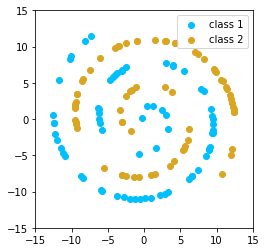

0.5


In [36]:
visualizer.plot_spiral_dataset(x_train, y_train)
print(list(y_train).count(0) / len(y_train))

In [37]:
xi = np.arange(-15, 15, 0.1)
xj = np.arange(-15, 15, 0.1)
x_sample = np.array([[j, i] for i in xi for j in xj])
out = M_model(torch.tensor(x_sample))

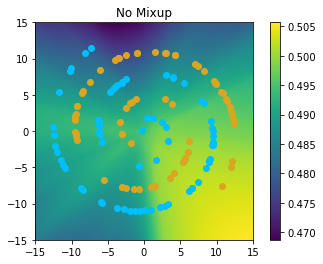

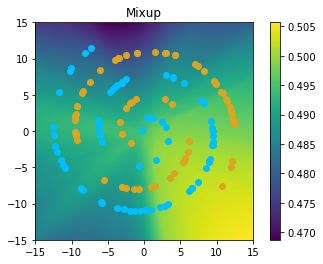

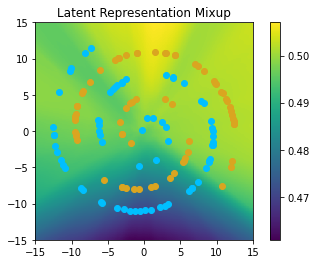

In [39]:
plt.figure(1)
visualizer.plot_spiral_model_confidence(NM_model, x_train, y_train, 'No Mixup')
plt.figure(2)
visualizer.plot_spiral_model_confidence(M_model, x_train, y_train, 'Mixup')
plt.figure(3)
visualizer.plot_spiral_model_confidence(LRM_model, x_train, y_train, 'Latent Representation Mixup')